#Основы Visual Basic for Applications
**Опорный конспект**

##Начало работы. Объявление процедуры
Объявление процедуры начинается с Sub *название процедуры*() и заканчивается End Sub. Процедуры находятся в модуле, который относится к конкретному Excel файлу.  

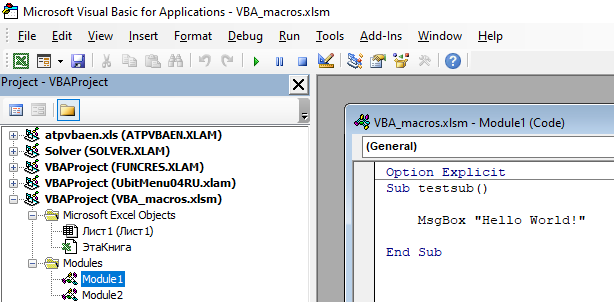  
Здесь в файле VBA_macros.xlsm создан модуль1, в котором и написана процедура вывода надписи "Hello world!"  

```
Sub testSub()
    MsgBox "Hellow world"
End Sub
```

MsgBox используется для вывода окошка с сообщением  

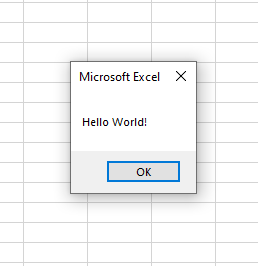




##Объявление переменных. Типы переменных

**BASIC VARIABLE.** Тип переменной, содержащей одно значение, заданного нами типа.  

**VARIANT.** Содержит одно значение переменной, тип которой мы не задавали. Определяется автоматически.  

**OBJECT VARIABLE.** Содержит объект, заданного нами типа. Это сложный объект, хранящий файл, лист или ячейку.  

**ARRAY.** Содержит много значений или объектов.  

Объявление переменной осуществляется с помощью команд Dim, а присвоение значения с помощью знака = у базовых переменных и команды Set и знака = у объектных переменных.
```
'BASIC VARIABLE
Dim someText As String
Dim someNumber As Long
Dim someDate As Date

someText = "Текстовая информация"
someNumber = 100
someDate = "19.09.2024" 'ДД.ММ.ГГГГ

MsgBox someText

'OBJECT VARIABLE
Dim someWorkbook As Workbook
Dim someWorksheet As Worksheet
Dim someRange As Range

Set someWorkbook = ThisWorkBook
Set SomeWorksheet = Worksheets("Лист1")
Set someRange = Range("C3")
```

Переменным можно передавать значение в виду арифмитических операций, либо в виде сложения строк

```
Dim someSecondNumber As Long
someSecondNumber = someNumber * 5

Dim someSecondText As String
someSecondText = someText & " + Test2"
```

По ходу выполнения процедуры значение переменной может меняться.

```
MsgBox someSecondText

someSecondText = "New text"

MsgBox someSecondText
MsgBox someSecondNumber
```
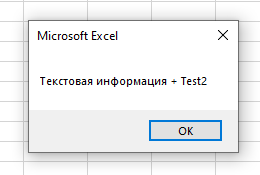  

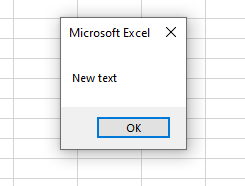  

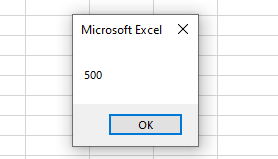





##Типы данных в VBA
| Тип данных | Размер в байтах | Диапазон |
|------------|-----------------|---------------------|
| Integer    | 2               | от -32.768 до 32.768   |
| Long       | 4               | от -2.147.483.648 до 2.147.483.648 |
| Double     | 8               | Отрицательные числа: от -1.79769313486232Е308 до -4.64065645841247Е-324 <br> Положительные числа: от 4.64065645841247Е-324 до 1.79769313486232Е308 |
| String     | 4               | от 1 до 65.400         |
| Date       | 8               | от 1 Января 0100 до 31 декабря 9999 |
| Boolean       | 2               | True и False |


## Рабочая книга, рабочий лист и ячейка(рабочая область). Виды обращений

Существует определенная иерархия.  
Workbooks -> Worksheets -> Range  
Основваясь на ней, мы и будем обращаться к ячейкам  

```
WORKBOOKS("EXAMPLE").WORKSHEETS("EXAMPLE").RANGE("A1")
```


###Виды обращения к объектам

Обращение к книгам (workbooks)

*    Workbooks("Книга1") - По имени книги
*    Workbooks(1) - По порядковому номеру в книге
*    ThisWorkbook - Текущая активная книга
*    ActiveWorkbook - Активная книга в момент выполнения

Обращение к листам (worksheets)

*    Worksheets("Лист1") - По имени листа
*    Worksheets(1) - По порядковому номеру в книге
*    ActiveSheet - Активный лист в момент выполнения

Обращение к диапазонам (range)

*    Range("A1") - Диапазон ячеек на активном листе




```
    'WORKBOOKS
    MsgBox Workbooks("VBA_macros.xlsm").Name
    MsgBox Workbooks(1).Name
    MsgBox ThisWorkbook.Name
    MsgBox ActiveWorkbook.Name
    
    'WORKSHEETS
    MsgBox Workbooks(1).Worksheets("Лист1").Name
    MsgBox Workbooks(1).Worksheets(1).Name
    MsgBox ThisWorkbook(1).ActiveSheet.Name
    
    'RANGE
    MsgBox Range("A1:D4").Address 'Обращение к области ячеек от A1 до D4
```



##Объект CELLS в VBA. Как использовать Cells в VBA

При помощи СELLS(1,1) указывается конкретная ячейка. Первый параметр - номер строки, второй параметр - номер столбца.
При помощи RANGE("A1:D4") мы указываем область из нескольких ячеек. Первый параметр - ячейка начала области, второй параметр - противоположная по диагонали области ячейка.



```
Sub cellsInVBA()

    Dim rowIndex As Long
    Dim columnIndex As Long
    
    rowIndex = ThisWorkbook.Worksheets(1).Cells(2, 2)
    columnIndex = ThisWorkbook.Worksheets(1).Cells(3, 2)
    
    'MsgBox "Строка: " & rowIndex
    'MsgBox "Столбец: " & columnIndex
    
    ThisWorkbook.Worksheets(1).Cells(rowIndex, columnIndex) = "Test"

End Sub
```

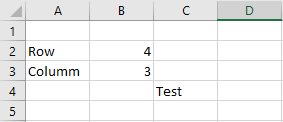



Здесь мы создаём переменные для передачи в объект Cells значения из ячеек B2, B3. Обращаемся к ячейке С4 и задаём ей значение.

### Еще один способ обращения к области

Комбинируя команды Range и Cells мы можем заполнять ячейки еще и так.

```

Sub testSub()

    ThisWorkbook.Worksheets(1).Range("A5:E10") = 1
    
    ThisWorkbook.Worksheets(1).Range(Cells(13, 1), Cells(20, 10)) = 2

End Sub
```
Ниже скриншот итога в таблице  

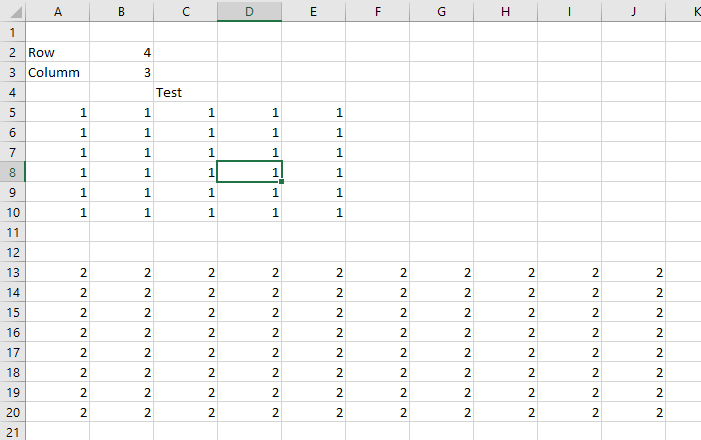



##With и Offset. Важный вспомогательный инструментарий

При помощи With мы можем значительно сократить и упростить код. Вместо того, чтобы каждый раз писать один и тот же путь к ячейкам, мы можем использовать With

Вместо:
```
ThisWorkbook.Worksheets(1).Range("A1") = 1
ThisWorkbook.Worksheets(1).Range("A2") = 2  
ThisWorkbook.Worksheets(1).Range("A3") = 3
```
Будет:
```
With ThisWorkbook.Worksheets(1)
        .Range("A1") = 1
        .Range("A2") = 2
        .Range("A3") = 3
    End With
```

При помощи Offset мы можем реализовать "сдвиг" ячейки.
```
ThisWorkbook.Worksheets(1).Range("A1").Offset(a,b)
```
Параметр a - сдвиг ячейки по строке
Параметр b - сдвиг ячейки по столбцу

###Пример работы с With и Offset



```
Sub testSub()

    With ThisWorkbook.Worksheets(1)
        With .Range("A1")
            .Value = "Жирный"
            .Font.Bold = True
        End With
        With .Range("A2")
            .Value = "Красный"
            .Font.Color = vbRed
        End With
        
        .Range("A3").Value = 3
    End With
    
End Sub
```
Итог:  

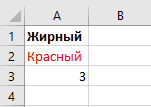






Применим Offset



```
Sub testSub()

    With ThisWorkbook.Worksheets(1)
        With .Range("A1").Offset(0, 0)
            .Value = "Жирный"
            .Font.Bold = True
        End With
        With .Range("A2").Offset(1, 0)
            .Value = "Красный"
            .Font.Color = vbRed
        End With
        
        .Range("A3").Offset(2, 0).Value = 3
    End With
    
End Sub
```
Итог:  
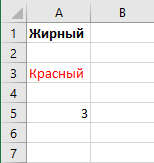



##For и For Each

Применение циклов в VBA осуществляется с помощью For для задания начала и конца цикла и Next для увеличения счетчика. Приведем пример заполнения первой строки таблицы числами от 1 до 10.

```
Sub testSub()

    Dim i As Long
    
    For i = 1 To 10
    
        ThisWorkbook.Worksheets(1).Cells(1, i) = i
        'или
        'ThisWorkbook.Worksheets(1).Range("A" & i) = i
    
    Next i

End Sub
```
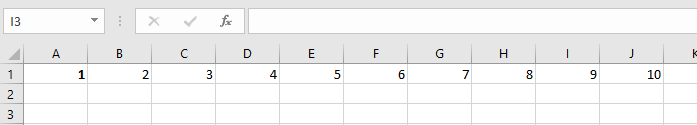



С помощью For Each мы также можем создавать циклы, но теперь в качестве параметров цикла будут использоваться сами ячейки.



```
Sub testSub2()

    Dim cellChecked As Range
    
    For Each cellCheked In Range("A1:J1")   
        cellChecked.Value = cellChecked.Value * 2        
    Next cellChecked

End Sub
```
Таким образом, мы не создаем переменную i для счетчика, а указыываем ячейки, по которым нужно перемещаться. Здесь мы идем по ранее заполненным ячейкам. Умножим их значения на два.

Получим:  
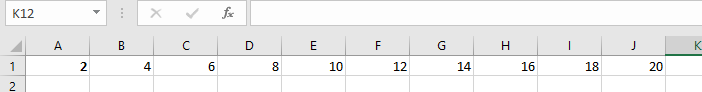


Проследим как цикл будет идти, если мы выберем область ячеек включающую несколько строк и столбцов. Для напишем процедуру.


```
Sub testSub3()

    Dim cellChecked As Range
    Dim i As Long
    
    i = 1
    
    For Each cellChecked In Range("A1:C3")   
        cellChecked.Value = i
        i = i + 1
    Next cellChecked

End Sub
```

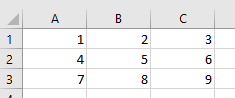  

Таким образом цикл сначала пройдем по всем столбцам первой строки, а потом перейдем на следующую строку.



Вот как можно сделать цикл по листам книги. Выведем их имена поочередно.



```
Sub testSub4()
    
    Dim ws As Worksheet
    
    For Each ws In ThisWorkbook.Worksheets
        MsgBox ws.Name  
    Next ws

End Sub
```



##Условия if, Elseif, Else. Логические операторы OR, AND.

Структура условий стандартна.

| Условие | Истина, если            |
|---------|-------------------------|
| x < 5   | x меньше, чем 5         |
| x > 5   | x больше, чем 5         |
| x <= 5  | x меньше или равен 5    |
| x >= 5  | x больше или равен 5    |
| x = 5   | x равен 5               |
| x <> 5  | x не равен 5            |
| x > 5 And x < 10  | x больше 5 И меньше 10            |
| x = 5 Or > 10  | x равен 5 ИЛИ меньше 10            |

Создадим таблицу для наглядности  
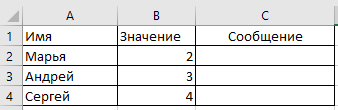

Заполним третий столбец данными с помощью условий.  

```
Sub lessonSub()

    With ThisWorkbook.Worksheets(3)
        If .Range("B2") > 1 Then
            .Range("C2") = "Значение больше 2"
        End If
        If .Range("B3") < 5 Then
            .Range("C3") = "Значение меньше 5"
        End If
        If .Range("B4") = 4 Then
            .Range("C4") = "Значение равно 4"
        End If
    End With
    
End Sub
```  
Результат:  
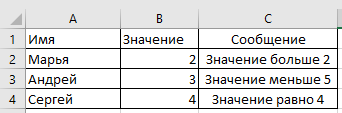



## Циклы Do, Loop, While, Intil, Exit Do. InputBox.
Цикл Do While повторяется до тех пор, пока выполняется заданное условие.


```
Sub looptest1()

    Dim checker As String
    checker = "ОК"
    
    Do While checker = "ОК"
        
        checker = InputBox("Напишите ОК, чтобы цикл продолжился")
    
    Loop
    
End Sub
```
InputBox - иодн из инстрементов VBA. Выводит окошко, в котором мы можем ввести значение, которое передастся переменной.
В данном примере нам будет выводится окошко с просьбой ввести что-либо. И так будет продолжаться, пока мы вводим ОК.  

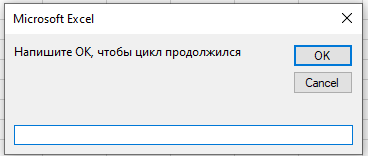





В предыдущем примере мы изначально задачи chekers = "ОК", иначе цикл бы не запустился. Для того, чтобы цикл гарантировано сделал один шаг, мы можем задать условие в конце.  



```
Sub looptest2()

    Dim checker As String
    
    Do
        
        checker = InputBox("Напишите ОК, чтобы цикл продолжился")
    
    Loop While checker = "ОК"
    
End Sub
```



С помощью ключевого слова Until мы можем задать циклу условие остановки.


```
Sub looptest3()

    Dim checker As String
    
    Do Until checker = "ОК"
        
        checker = InputBox("Напишите ОК, чтобы цикл остановился")

        If checker = "END" Then
            Exit Do
        End If
    
    Loop
    
End Sub
```
В отличие от предыдущих примеров здесь цикл остановится тогда, когда введем в InputBox слово ОК.

Для выхода из цикла можно написать Exit Do. В примере выше цикл остановится также, если пользователь введет END.



##Ключевое слово Count

Свойство Count используется для подсчета тех или иных объектов.
```
Sub learningCount()
    
    MsgBox "Количество ячеек в области A1:D7 -> " & Range("A1:D7").Cells.Count
    
    MsgBox "Количество листов в книге -> " & ThisWorkbook.Worksheets.Count
    
    MsgBox "Количество открытых книг -> " & Application.Workbooks.Count

End Sub
```
В данном случае будет выведено окошко с результатами подсчета. Обращение Application. просто означает обращение к приложению, то есть к Excel.  

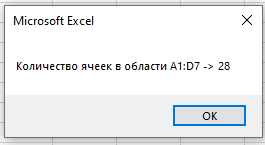  

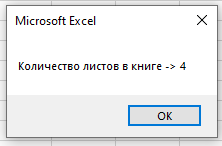  
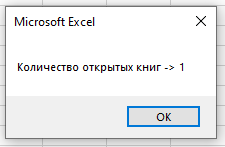



##Функция End для нахождения использованных строк, столбцов.  
С помощью функции End можно найти последнюю использованную строку или столбец, передавая аргумент с направлением поиска: End(xlUp), End(xlDown), End(xlToLeft), End(xlToRight). Найдём последний использованный столбец строки 1 и последнюю использованную строку столбца 1 у таблицы ниже.
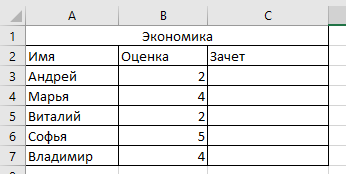



```
Sub endLearning1()

    Dim lastRow As Long
    lastRow = Worksheets(4).Cells(Rows.Count, 1).End(xlUp).Row
    MsgBox "Последняя использованная строка" & lastRow

End Sub


Sub endLearning2()

    Dim lastColumn As Long
    lastColumn = Worksheets(4).Cells(1, Columns.Count).End(xlToLeft).Column
    MsgBox "Последний использованный столбец" & lastColumn

End Sub
```



Вывод:  
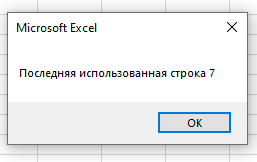

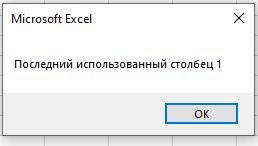  
Да, объединенная ячейка считается как за первую

Еще один способ.  


```
Sub RngRowsAndColumnsNum()
    
    Dim FstRngRow As Long, RngRowsCnt As Long, LstRngRow As Long
    Dim FstRngColumn As Long, RngColumnsCnt As Long, LstRngColumn As Long

'СТРОКИ

    FstRngRow = ActiveSheet.UsedRange.row
    RngRowsCnt = ActiveSheet.UsedRange.Rows.Count
    LstRngRow = RngRowsCnt + FstRngRow - 1
    
    MsgBox "Первая строка диапазона - " & FstRngRow
    MsgBox "Всего строк в диапазоне - " & RngRowsCnt
    MsgBox "Последняя строка диапазона - " & LstRngRow

'СТОЛБЦЫ

    FstRngColumn = ActiveSheet.UsedRange.column
    RngColumnsCnt = ActiveSheet.UsedRange.Columns.Count
    LstRngColumn = RngColumnsCnt + FstRngColumn - 1
    
    MsgBox "Первый столбец в диапазоне - " & FstRngColumn
    MsgBox "Всего столбцов в диапазоне - " & RngColumnsCnt
    MsgBox "Последний столбец диапазона - " & LstRngColumn
    
End Sub
```



##Практическое задание  
Есть таблица с номером, именами студентов и оценкой. Нужно вывести столбец "Итог", в котором будет подсчитано среднее значение оценки. При этом среднее значение будет окрашено в соответствуюший цвет:

*   => 4 - красный
*   < 4 AND => 3 - желтый
*   < 3 - красный

Если же до запуска программы существовал столбец "Итог" и данные уже были подсчитанны, то в уже существующем столбцы среднее должно быть пересчитано по новым значениям в таблице.  
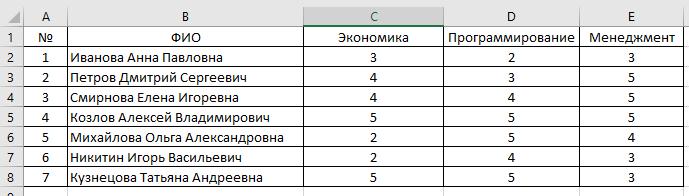  

Решение:



```
Sub UpdateOrCreateAverageAndColor()
    Dim ws As Worksheet
    Dim lastRow As Long
    Dim avgRange As Range
    Dim cell As Range
    Dim lastColumn As Long
    Dim avgColumn As Long
    Dim found As Boolean
    
    Set ws = ThisWorkbook.Sheets("Лист2")
    
    ' Если столбец итог есть, то изменим координаты для подсчета значений
    found = False
    For Each cell In ws.Rows(1).Cells
        If cell.Value = "Итог" Then
            found = True
            avgColumn = cell.Column
            Exit For
        End If
    Next cell
    
    lastColumn = ws.Cells(1, ws.Columns.Count).End(xlToLeft).Column
    
    ' Если итога нет, то создаем его
    If Not found Then
        ws.Cells(1, lastColumn + 1).Value = "Итог"
        avgColumn = lastColumn + 1
        
        ws.Cells(1, lastColumn + 1).Font.Color = vbBlack
        ws.Cells(1, lastColumn + 1).Borders.LineStyle = xlContinuous
        ws.Cells(1, lastColumn + 1).Borders.Color = vbBlack
    End If
    
    lastRow = ws.Cells(ws.Rows.Count, "B").End(xlUp).Row
    Set avgRange = ws.Range(ws.Cells(2, 3), ws.Cells(lastRow, lastColumn - 1))

    For Each cell In avgRange.Rows
        
        ' Подсчет среднего
        cell.Cells(1, avgColumn - 2).Formula = "=AVERAGE(" & cell.Address & ")"

        ' Назначение цвета
        If ws.Cells(cell.Row, avgColumn).Value >= 4 Then
            ws.Cells(cell.Row, avgColumn).Interior.Color = vbGreen
        ElseIf ws.Cells(cell.Row, avgColumn).Value >= 3 Then
            ws.Cells(cell.Row, avgColumn).Interior.Color = vbYellow
        Else
            ws.Cells(cell.Row, avgColumn).Interior.Color = vbRed
        End If
    
        ws.Cells(cell.Row, avgColumn).Font.Color = vbBlack
        ws.Cells(cell.Row, avgColumn).Borders.LineStyle = xlContinuous
        ws.Cells(cell.Row, avgColumn).Borders.Color = vbBlack

    Next cell
    
End Sub
```
Вывод:  
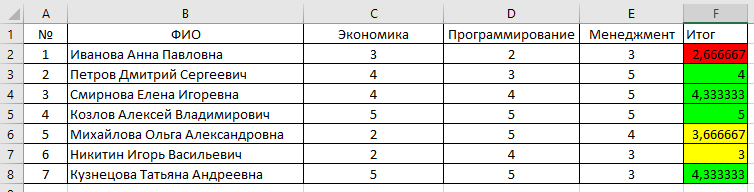

